In [1]:
import random
import numpy as np
import pandas as pd
from google.colab import files
import io

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving titanic.csv to titanic.csv


In [25]:
data = pd.read_csv(io.StringIO(uploaded['titanic.csv'].decode('utf-8')) )

In [3]:
data.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [26]:
data.fillna(0, inplace = True)
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [7]:
data.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500     0         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250     0         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500     0         S

[5 rows x 12 columns]

In [27]:
data['Survived'] = data['Survived'].map({
    0: 'Died',
    1: 'Survived'
})
data.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1      Died       3  ...   7.2500     0         S
1            2  Survived       1  ...  71.2833   C85         C
2            3  Survived       3  ...   7.9250     0         S
3            4  Survived       1  ...  53.1000  C123         S
4            5      Died       3  ...   8.0500     0         S

[5 rows x 12 columns]

In [21]:
media_eta = data[data['Age'] != 0.0]['Age'].mean()


In [22]:
data['Age2'] = data['Age'].map({
    0.0: media_eta,
    
})
data

PassengerId  Survived  Pclass  ... Cabin Embarked       Age2
0              1      Died       3  ...     0        S        NaN
1              2  Survived       1  ...   C85        C        NaN
2              3  Survived       3  ...     0        S        NaN
3              4  Survived       1  ...  C123        S        NaN
4              5      Died       3  ...     0        S        NaN
..           ...       ...     ...  ...   ...      ...        ...
886          887      Died       2  ...     0        S        NaN
887          888  Survived       1  ...   B42        S        NaN
888          889      Died       3  ...     0        S  29.699118
889          890  Survived       1  ...  C148        C        NaN
890          891      Died       3  ...     0        Q        NaN

[891 rows x 13 columns]

In [29]:
data['Embarked'] = data['Embarked'].map({
    'C':'Cherbourg',
    'Q':'Queenstown',
    'S':'Southampton',
})
data

PassengerId  Survived  Pclass  ... Cabin     Embarked    Embarked2
0              1      Died       3  ...     0  Southampton  Southampton
1              2  Survived       1  ...   C85    Cherbourg    Cherbourg
2              3  Survived       3  ...     0  Southampton  Southampton
3              4  Survived       1  ...  C123  Southampton  Southampton
4              5      Died       3  ...     0  Southampton  Southampton
..           ...       ...     ...  ...   ...          ...          ...
886          887      Died       2  ...     0  Southampton  Southampton
887          888  Survived       1  ...   B42  Southampton  Southampton
888          889      Died       3  ...     0  Southampton  Southampton
889          890  Survived       1  ...  C148    Cherbourg    Cherbourg
890          891      Died       3  ...     0   Queenstown   Queenstown

[891 rows x 13 columns]

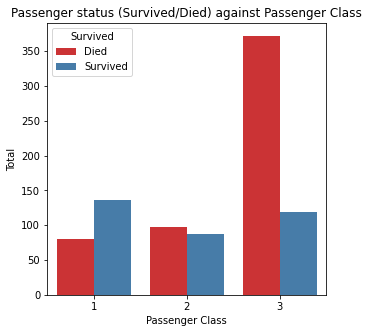

In [31]:
fig, ax = plt.subplots(1,1, figsize = (5,5))
ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'Set1', data = data)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class', 
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

Survived  Died  Survived
Sex                     
female      81       233
male       468       109


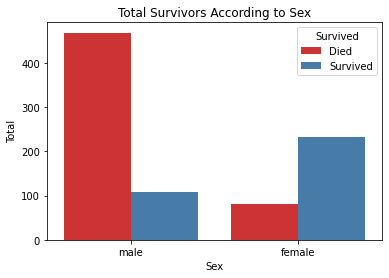

In [35]:
print(pd.crosstab(data["Sex"],data.Survived))
ax = sns.countplot(x = 'Sex', hue = 'Survived', palette = 'Set1', data = data)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'Sex', ylabel='Total')
plt.show()

In [36]:
interval = (0,18,35,60,120)
categories = ['Children','Teens','Adult', 'Old']
data['Age_cats'] = pd.cut(data.Age, interval, labels = categories)

data

PassengerId  Survived  Pclass  ...     Embarked    Embarked2  Age_cats
0              1      Died       3  ...  Southampton  Southampton     Teens
1              2  Survived       1  ...    Cherbourg    Cherbourg     Adult
2              3  Survived       3  ...  Southampton  Southampton     Teens
3              4  Survived       1  ...  Southampton  Southampton     Teens
4              5      Died       3  ...  Southampton  Southampton     Teens
..           ...       ...     ...  ...          ...          ...       ...
886          887      Died       2  ...  Southampton  Southampton     Teens
887          888  Survived       1  ...  Southampton  Southampton     Teens
888          889      Died       3  ...  Southampton  Southampton       NaN
889          890  Survived       1  ...    Cherbourg    Cherbourg     Teens
890          891      Died       3  ...   Queenstown   Queenstown     Teens

[891 rows x 14 columns]

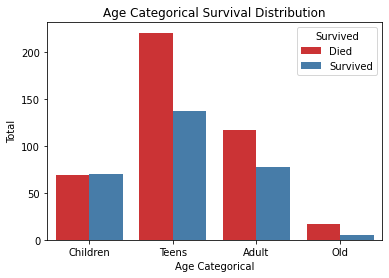

In [37]:
ax = sns.countplot(x = 'Age_cats',  data = data, hue = 'Survived', palette = 'Set1')

ax.set(xlabel='Age Categorical', ylabel='Total',
       title="Age Categorical Survival Distribution")

plt.show()

Survived     Died  Survived
Embarked                   
Cherbourg      75        93
Queenstown     47        30
Southampton   427       217


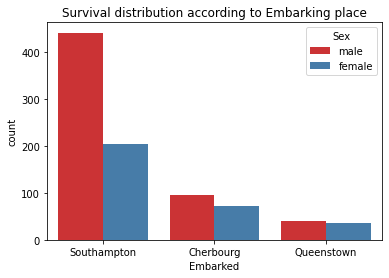

In [40]:
print(pd.crosstab(data['Embarked'], data.Survived))
ax = sns.countplot(x = 'Embarked', hue = 'Sex', palette = 'Set1', data = data)
ax.set(title = 'Survival distribution according to Embarking place')
plt.show()

In [44]:
data.drop(['Embarked2'], 1, inplace =True)
data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500       0.0
1         1       1    1  38.0      1      0  71.2833       1.0
2         1       3    1  26.0      0      0   7.9250       0.0
3         1       1    1  35.0      1      0  53.1000       0.0
4         0       3    0  35.0      0      0   8.0500       0.0

In [42]:
data.Sex.replace(('male','female'), (0,1), inplace = True)
data.Embarked.replace(('Southampton','Cherbourg','Queenstown'), (0,1,2), inplace = True)
data.Survived.replace(('Died','Survived'), (0,1), inplace = True)
data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked    Embarked2
0         0       3    0  22.0      1      0   7.2500       0.0  Southampton
1         1       1    1  38.0      1      0  71.2833       1.0    Cherbourg
2         1       3    1  26.0      0      0   7.9250       0.0  Southampton
3         1       1    1  35.0      1      0  53.1000       0.0  Southampton
4         0       3    0  35.0      0      0   8.0500       0.0  Southampton

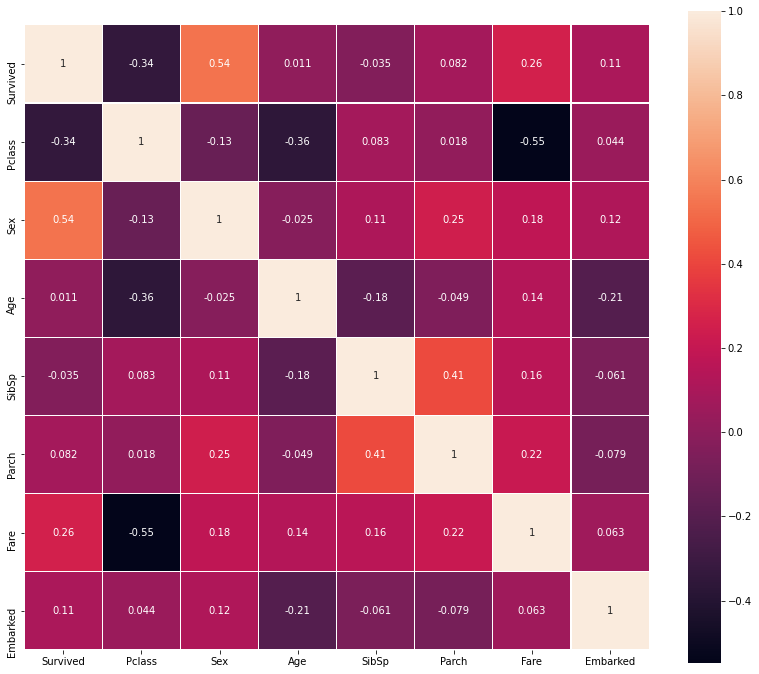

In [45]:
 # Correlation between the features
plt.figure(figsize=(14,12))
sns.heatmap(data.astype(float).corr(),linewidths=0.1, 
            square=True,  linecolor='white', annot=True)
plt.show()